In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

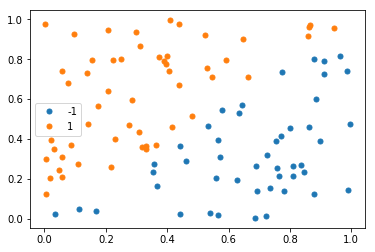

In [4]:
def generate_training_data(n):
    x0 = np.random.rand(n)
    x1 = np.random.rand(n)
    labels = [1 if xx0<xx1 else -1 for xx0, xx1 in zip(x0, x1)]
    train_data = pd.DataFrame({'x0': x0, 'x1': x1, 'label': labels})
    return train_data

train_data = generate_training_data(100)
groups = train_data.groupby('label')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x0, group.x1, marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()

In [5]:
def sign(x):
    if x>=0:
        return 1
    else:
        return -1
    
class Perceptron(object):
    def __init__(self, feature_len=2, lr=0.1):
        self.weights = [random.uniform(0,1) for i in range(feature_len)]
        self.lr = lr
    
    def guess(self, features):
        tot = 0
        for i in range(len(features)):
            tot += self.weights[i]*features[i]
        return sign(tot)
    
    def train(self, features, target):
        guess = self.guess(features)
        error = target - guess
        
        # tune the weights
        for i in range(len(features)):
            self.weights[i] = self.weights[i] + error * features[i] * self.lr

In [6]:
train_data = generate_training_data(100)
p = Perceptron(lr=0.1)

def get_squared_error(train_data, p):
    tot_error = 0
    for i, row in train_data.iterrows():
        features = [row['x0'], row['x1']]
        target = row['label']
        guess = p.guess(features)
        error = target - guess
        tot_error += error * error
    return tot_error

get_squared_error(train_data, p)

184.0

In [7]:
for i, row in train_data.iterrows():
    features = [row['x0'], row['x1']]
    target = row['label']
    p.train(features, target)
    if p.guess(features) != target:
        print get_squared_error(train_data, p), p.weights

184.0 [0.24122459562989595, 0.2045860022685012]
184.0 [0.10704892138981545, 0.12080941642472266]
184.0 [0.00407283545814216, 0.045542634277231625]
156.0 [-0.30977015878434155, 0.0841373248383296]


In [124]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class NeuralNet(object):
    def __init__(self, n_features, n_hidden, n_out):
        self.learning_rate = 0.1
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.n_out = n_out
        
        self.weights_ih = np.random.rand(n_hidden, n_features)
        self.weights_ho = np.random.rand(n_out, n_hidden)
        self.bias_ih = np.random.rand(n_hidden)
        self.bias_ho = np.random.rand(n_out)
    
    def get_backward_errors(self, weights, errors):
        return weights.T.dot(errors)
    
    def feedforward(self, features_array):
        features = np.array(features_array)
        hidden = sigmoid(self.weights_ih.dot(features) + self.bias_ih)
        output = sigmoid(self.weights_ho.dot(hidden) + self.bias_ho)
        return output
    
    def learn(self, features_array, labels_array):
        labels = np.array(labels_array)
#         outputs = self.feedforward(features_array)
        features = np.array(features_array)
        hidden = sigmoid(self.weights_ih.dot(features) + self.bias_ih)
        
        outputs = sigmoid(self.weights_ho.dot(hidden) + self.bias_ho)
        
        output_errors = labels - outputs
        gradient = outputs * (1 - outputs)
        delta_weights_ho = self.learning_rate * np.array(gradient.dot(output_errors)).dot(hidden.T)
        self.weights_ho = self.weights_ho + delta_weights_ho
        self.bias_ho = self.bias_ho + self.learning_rate * np.array(gradient.dot(output_errors))
        
        hidden_errors = self.get_backward_errors(self.weights_ho, output_errors)
        hidden_gradient = hidden * (1 - hidden)
        delta_weights_ih = self.learning_rate * np.array(hidden_errors.dot(hidden_gradient)).dot(features.T)
        self.weights_ih = self.weights_ih + delta_weights_ih
        self.bias_ih = self.bias_ih + self.learning_rate * np.array(hidden_errors.dot(hidden_gradient))
        
    def evaluate(self, features_array):
        return self.feedforward(features_array)
        

In [125]:
nn = NeuralNet(2, 2, 1)
nn.feedforward([1,0])

array([0.73818907])

In [140]:
features = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])
labels = np.array([[1], [1], [0], [0]])
for i in np.random.choice(4, 100000):
    nn.learn(features[i], labels[i])

In [141]:
print(nn.evaluate([1, 0]))
print(nn.evaluate([0, 1]))
print(nn.evaluate([1, 1]))
print(nn.evaluate([0, 0]))

[0.70992133]
[0.70991971]
[0.71027621]
[0.01804897]


In [ ]:
sigmoid(z.T)

In [20]:
test = np.array([1,2,3])
test

array([1, 2, 3])

In [21]:
test * (1 - test)

array([ 0, -2, -6])